In [15]:
import pandas as pd

df = pd.read_csv('US_Accidents_March23.csv', low_memory=False)
pd.set_option('display.max_columns', None)  # show all columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [19]:
# Drop rows where essential fields are missing
critical_cols = ['Start_Lat', 'Start_Lng', 'Severity', 'Start_Time', 'Weather_Condition']
df.dropna(subset=critical_cols, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Safely convert datetime columns
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Drop rows where datetime conversion failed
df.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

# Remove outliers from temperature
df = df[df['Temperature(F)'] < 130]
print(df)


                ID   Source  Severity          Start_Time            End_Time  \
0              A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1              A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2              A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3              A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4              A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07   
...            ...      ...       ...                 ...                 ...   
7728389  A-7777757  Source1         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
7728390  A-7777758  Source1         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
7728391  A-7777759  Source1         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
7728392  A-7777760  Source1         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
7728393  A-7777761  Source1         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_

In [21]:
# Time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df['Year'] = df['Start_Time'].dt.year

# Duration of accident
df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# Time of day
def time_slot(h):
    if h < 6: return 'Night'
    elif h < 12: return 'Morning'
    elif h < 18: return 'Afternoon'
    return 'Evening'
df['Time_of_Day'] = df['Hour'].apply(time_slot)


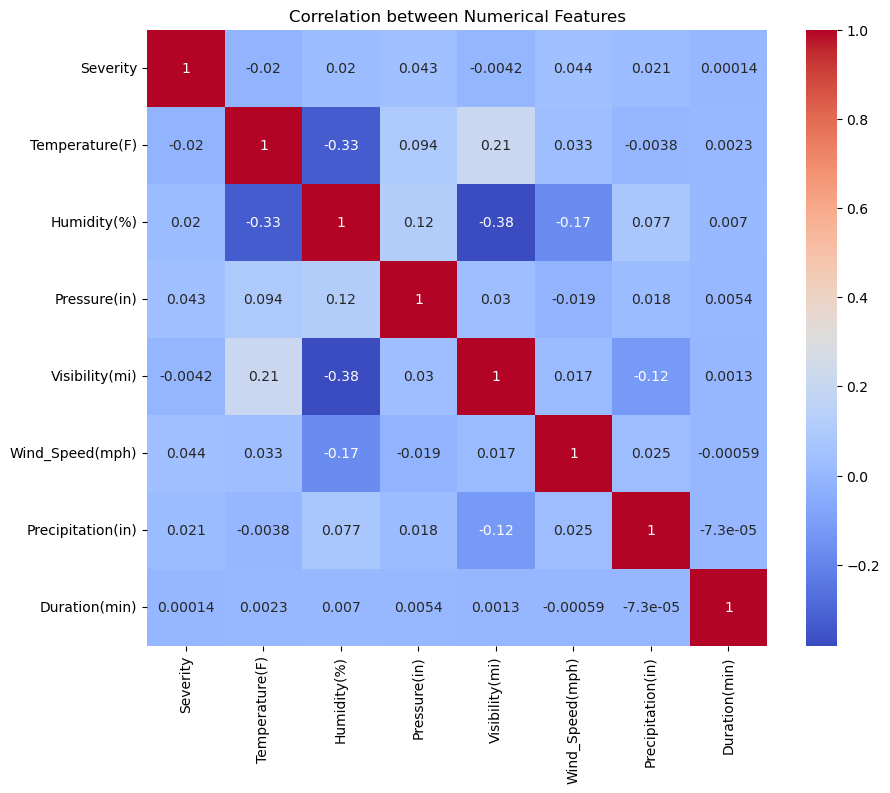

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Duration(min)']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


C:\Users\p00za\AppData\Local\Temp\ipykernel_19420\3944317610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_filtered, x='Weather_Condition', y='Severity', palette='Set2')


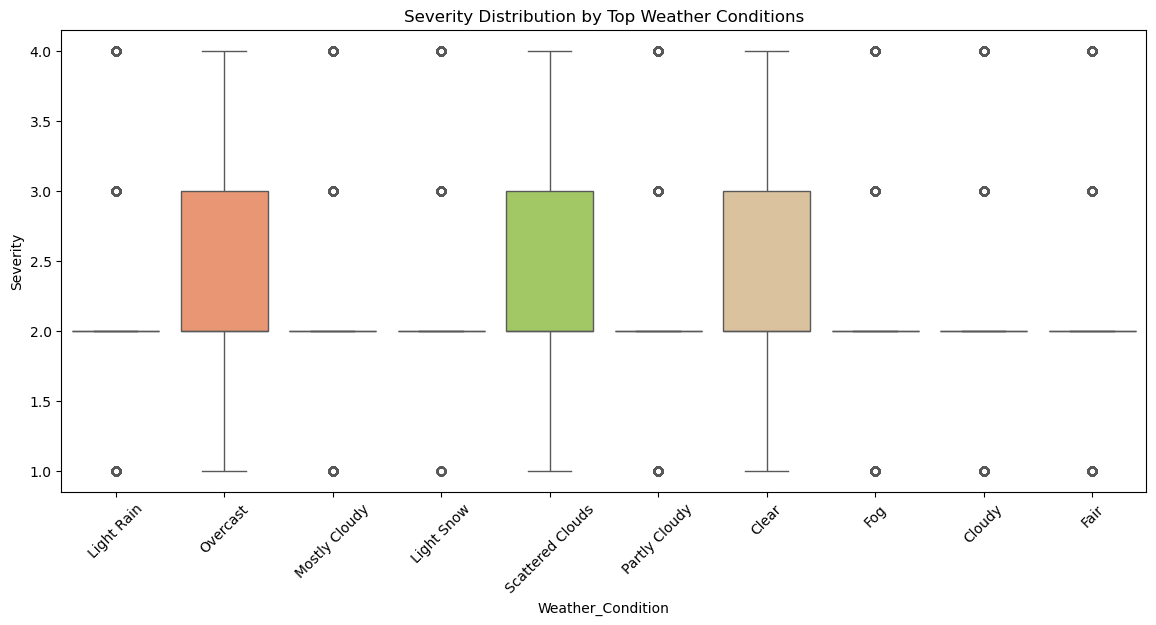

In [25]:
top_weather = df['Weather_Condition'].value_counts().head(10).index
weather_filtered = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=weather_filtered, x='Weather_Condition', y='Severity', palette='Set2')
plt.title('Severity Distribution by Top Weather Conditions')
plt.xticks(rotation=45)
plt.show()


In [27]:
from sklearn.cluster import KMeans
import numpy as np

coords = df[['Start_Lat', 'Start_Lng']].dropna()
kmeans = KMeans(n_clusters=20, random_state=0).fit(coords)
df['Cluster'] = kmeans.labels_

# Visualize on Folium
import folium
from folium.plugins import MarkerCluster

map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=5)
cluster_map = MarkerCluster().add_to(m)

for idx, row in df.sample(1000).iterrows():
    folium.Marker(location=[row['Start_Lat'], row['Start_Lng']],
                  popup=f"Severity: {row['Severity']} | Weather: {row['Weather_Condition']}").add_to(cluster_map)

m.save("advanced_accident_clusters.html")


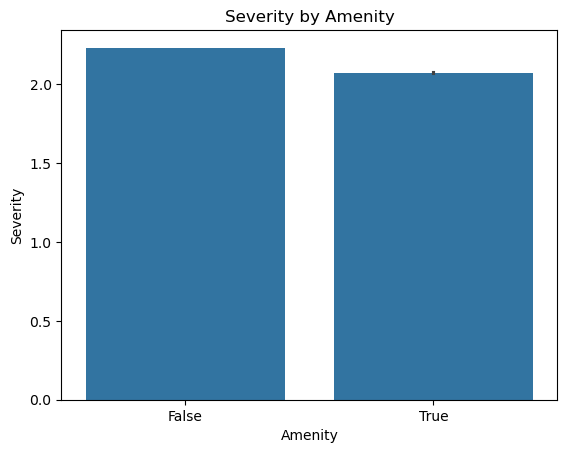

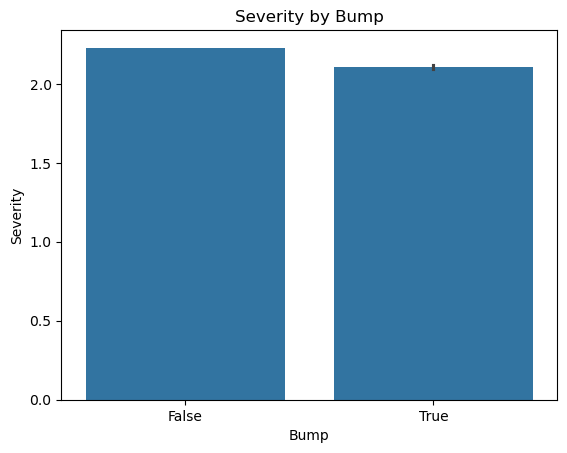

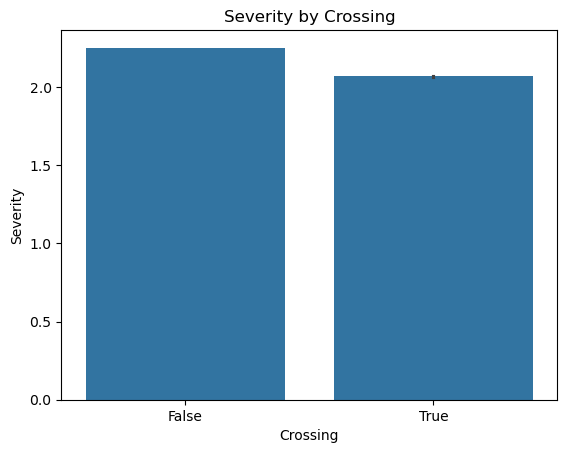

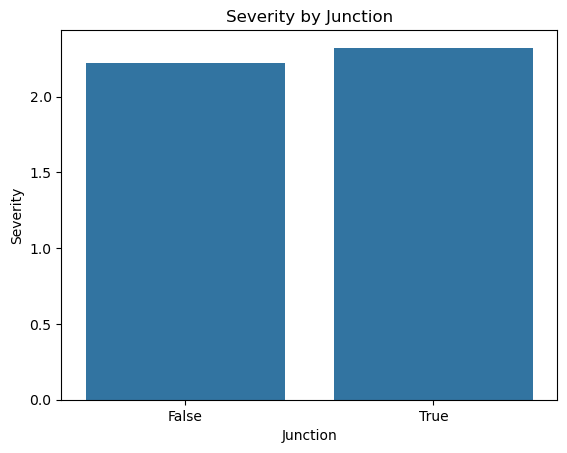

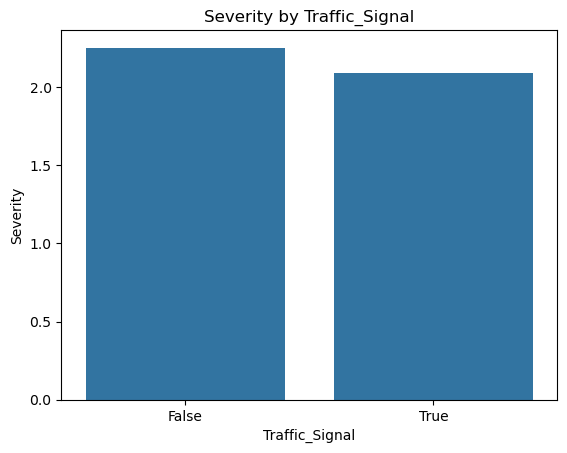

In [29]:
categoricals = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']
for col in categoricals:
    sns.barplot(x=col, y='Severity', data=df)
    plt.title(f'Severity by {col}')
    plt.show()


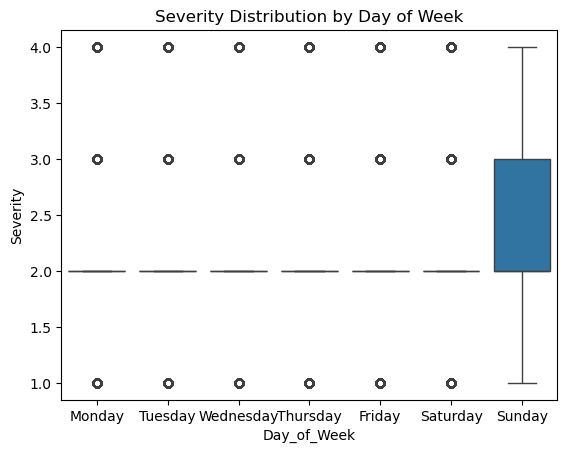

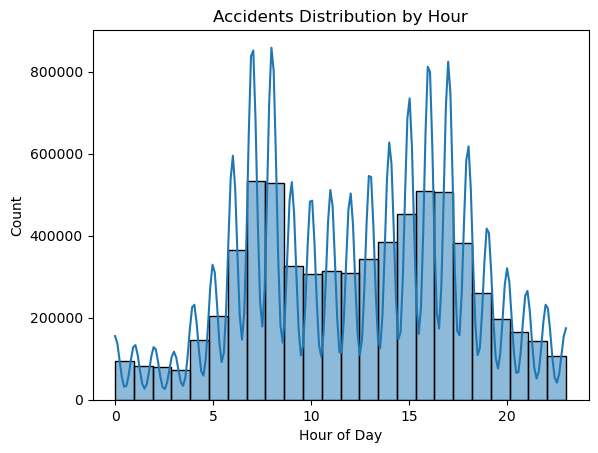

In [31]:
# Severity by Day of Week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='Day_of_Week', y='Severity', data=df, order=dow_order)
plt.title('Severity Distribution by Day of Week')
plt.show()

# Accidents by Hour
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Accidents Distribution by Hour')
plt.xlabel('Hour of Day')
plt.show()


Data shape after dropping NA: (4693984, 7)


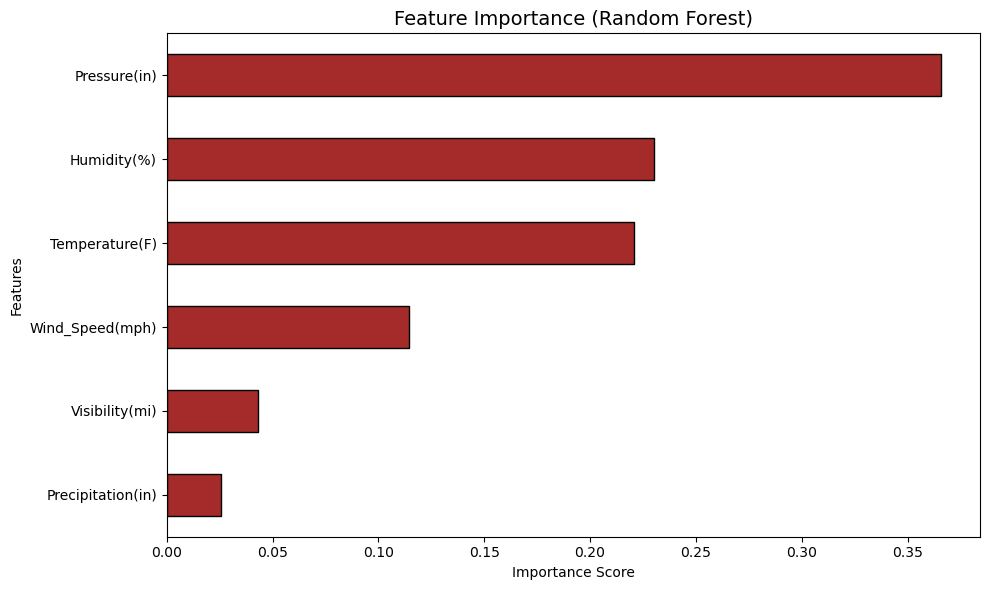

In [35]:
# Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# %matplotlib inline  # Uncomment this line if you're in Jupyter Notebook

# Drop rows with missing values for selected columns
model_df = df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
               'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']].dropna()

print("Data shape after dropping NA:", model_df.shape)  # Debug print

# Features and Target
X = model_df.drop('Severity', axis=1)
y = model_df['Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))  # Add this to ensure proper sizing
importances.sort_values().plot(kind='barh', color='brown', edgecolor='black')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
